In supervised learning, when the model predicts categorical or discrete values based on a training dataset is called it is called as a Classification model. We will learn how to solve classification problems using Bank marketing dataset.
### Problem Statement ###
The dataset is a subset of data that comes from the $UCI Machine Learning repository^{1}$, and it is related to direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict whether the client will subscribe (yes/no) to a term deposit (variable y).<br/>
It is a classification problem since the target variable y is discrete. Within classification, we have two types: <br/>
1.Binary Classification: Here the target variable(which is discrete) can take only two values.For example, win/loss, yes/no,1/0 <br/>
2.Multi-Class Classification: Here the target variable can take more than two values. For example


### Data ###
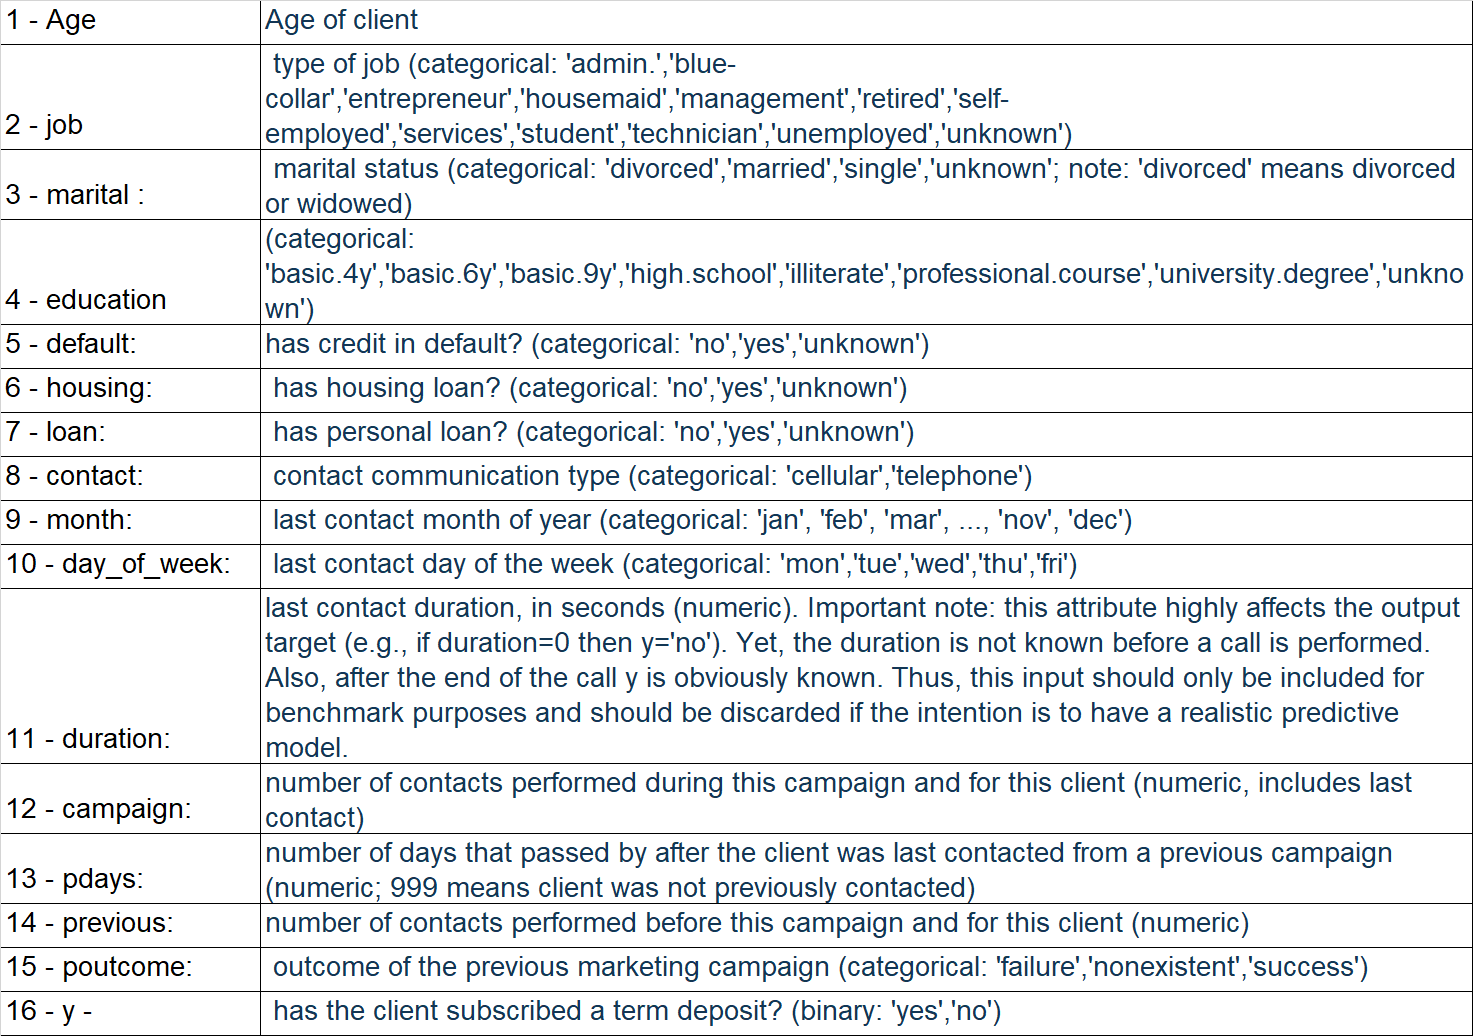

### Classification Using Logistic Regression ###
Logistic Regression is a classification algorithm that is used to predict the probability of a categorical variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, win, etc.) or 0 (no, loss, etc.). In other words, the logistic regression model predicts P(Y=1) as a function of input(X). Let's get started!

In [2]:
##Load Necessary Libraries##
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

Let's Load and explore the data

In [3]:
####Exercise:Read the csv file "bank.csv" from Data folder and store it in variable named bmarket####
bmarket=pd.read_csv("Data/bank.csv")

In [4]:
####Exercise:How many rows and columns does it have####
bmarket.shape

(11162, 17)

The dataset provides the bank customers’ information. It includes 11162 records and 17 columns

In [5]:
####Exercise:Print the top 10 rows####
bmarket.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [6]:
bmarket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
age          11162 non-null int64
job          11162 non-null object
marital      11162 non-null object
education    11162 non-null object
default      11162 non-null object
balance      11162 non-null int64
housing      11162 non-null object
loan         11162 non-null object
contact      11162 non-null object
day          11162 non-null int64
month        11162 non-null object
duration     11162 non-null int64
campaign     11162 non-null int64
pdays        11162 non-null int64
previous     11162 non-null int64
poutcome     11162 non-null object
deposit      11162 non-null object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [7]:
#Univariate Analysis for AGE
bmarket[["age"]].describe()

,age
count,11162.000000
mean,41.231948
std,11.913369
min,18.000000
25%,32.000000
50%,39.000000
75%,49.000000
max,95.000000


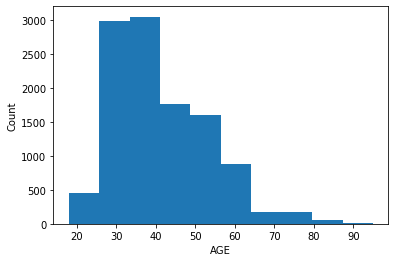

In [8]:
plt.hist(bmarket.age)
plt.xlabel("AGE")
plt.ylabel("Count")
plt.show()

In [9]:
bmarket=bmarket.drop("balance",axis=1)

In [10]:
#Univariate analysis for duration
bmarket[["duration"]].describe()

,duration
count,11162.000000
mean,371.993818
std,347.128386
min,2.000000
25%,138.000000
50%,255.000000
75%,496.000000
max,3881.000000


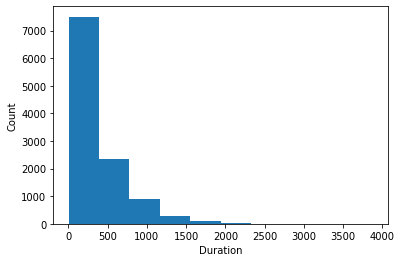

In [11]:
plt.hist(bmarket.duration)
plt.xlabel("Duration")
plt.ylabel("Count")
plt.show()

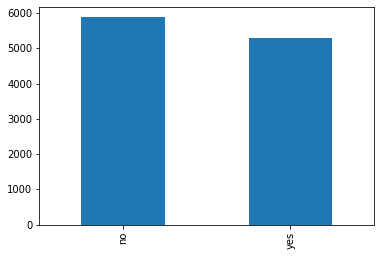

In [12]:
#Univariate Analysis for deposit/y
bmarket.deposit.value_counts().plot(kind="bar")
plt.show()

### Bi-Variate Analysis ###

In [13]:
#
bmarket.groupby("deposit").mean()

,age,day,duration,campaign,pdays,previous
deposit,,,,,,
no,40.837391,16.108122,223.130257,2.839264,35.685340,0.528350
yes,41.670070,15.158253,537.294574,2.141047,68.702968,1.170354


In [14]:
bmarket.groupby("job").mean()

,age,day,duration,campaign,pdays,previous
job,,,,,,
admin.,39.374063,15.340330,347.929535,2.376312,64.338831,0.973763
blue-collar,39.505144,15.235597,394.658951,2.541152,44.061214,0.633230
entrepreneur,42.887195,15.442073,370.182927,2.725610,32.746951,0.536585
housemaid,47.445255,16.364964,348.346715,2.689781,33.540146,0.503650
management,40.218239,15.792284,361.482073,2.588075,54.456352,0.925175
retired,65.424165,15.519280,389.993573,2.131105,53.003856,0.994859
self-employed,39.809877,15.938272,396.155556,2.533333,45.039506,0.804938
services,38.141928,15.728061,385.955580,2.576381,51.546046,0.684724
student,26.102778,15.175000,330.672222,2.169444,68.683333,1.297222


In [15]:
pd.crosstab(bmarket.deposit,bmarket.job,margins=True)

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown,All
deposit,,,,,,,,,,,,,
no,703,1236,205,165,1265,262,218,554,91,983,155,36,5873
yes,631,708,123,109,1301,516,187,369,269,840,202,34,5289
All,1334,1944,328,274,2566,778,405,923,360,1823,357,70,11162


In [16]:
pd.crosstab(bmarket.deposit,bmarket.marital,margins=True)

marital,divorced,married,single,All
deposit,,,,
no,671,3596,1606,5873
yes,622,2755,1912,5289
All,1293,6351,3518,11162


In [17]:
pd.crosstab(bmarket.deposit,bmarket.education,margins=True)

education,primary,secondary,tertiary,unknown,All
deposit,,,,,
no,909,3026,1693,245,5873
yes,591,2450,1996,252,5289
All,1500,5476,3689,497,11162


In [18]:
pd.crosstab(bmarket.deposit,[bmarket.education,bmarket.marital],margins=True)

education  primary                secondary                tertiary          \
marital   divorced married single  divorced married single divorced married   
deposit                                                                       
no             100     703    106       361    1816    849      183     930   
yes            104     396     91       291    1304    855      203     913   
All            204    1099    197       652    3120   1704      386    1843   

education         unknown                   All  
marital   single divorced married single         
deposit                                          
no           580       27     147     71   5873  
yes          880       24     142     86   5289  
All         1460       51     289    157  11162

In [19]:
pd.crosstab([bmarket.job,bmarket.marital],bmarket.deposit,margins=True)

deposit                   no   yes    All
job           marital                    
admin.        divorced    92    90    182
              married    371   306    677
              single     240   235    475
blue-collar   divorced    91    58    149
              married    898   437   1335
              single     247   213    460
entrepreneur  divorced    27    15     42
              married    153    81    234
              single      25    27     52
housemaid     divorced    28    18     46
              married    123    67    190
              single      14    24     38
management    divorced   146   142    288
              married    747   681   1428
              single     372   478    850
retired       divorced    50   121    171
              married    199   382    581
              single      13    13     26
self-employed divorced    17    22     39
              married    143    79    222
              single      58    86    144
services      divorced    71    50    121
              married    326   178    504
              single     157   141    298
student       divorced     1     1      2
              married      5    10     15
              single      85   258    343
technician    divorced   127    77    204
              married    514   416    930
              single     342   347    689
unemployed    divorced    20    27     47
              married     89    97    186
              single      46    78    124
unknown       divorced     1     1      2
              married     28    21     49
              single       7    12     19
All                     5873  5289  11162

#### Dummy Variables #####

In [20]:
bmarket.head(5)

,age,job,marital,education,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [21]:
cat_col = bmarket.select_dtypes(include=['object']).columns
dummies = pd.get_dummies(bmarket[cat_col],drop_first=True)
without_dummies = bmarket.drop(cat_col,axis=1)

In [22]:
dummies.head(5)

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,deposit_yes
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
2,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,1
3,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1


In [23]:
data = pd.concat([dummies,without_dummies],axis=1)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 42 columns):
job_blue-collar        11162 non-null uint8
job_entrepreneur       11162 non-null uint8
job_housemaid          11162 non-null uint8
job_management         11162 non-null uint8
job_retired            11162 non-null uint8
job_self-employed      11162 non-null uint8
job_services           11162 non-null uint8
job_student            11162 non-null uint8
job_technician         11162 non-null uint8
job_unemployed         11162 non-null uint8
job_unknown            11162 non-null uint8
marital_married        11162 non-null uint8
marital_single         11162 non-null uint8
education_secondary    11162 non-null uint8
education_tertiary     11162 non-null uint8
education_unknown      11162 non-null uint8
default_yes            11162 non-null uint8
housing_yes            11162 non-null uint8
loan_yes               11162 non-null uint8
contact_telephone      11162 non-null uint8
contact_unk

#### Logistic Regression ####

In [25]:
y = data["deposit_yes"]
X = data.drop("deposit_yes",axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                    test_size=0.3,random_state=1)
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
ypred  = logreg.predict(X_test)
from sklearn import metrics
metrics.log_loss(y_test,ypred)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


6.033261297806689

In [26]:
y=data["deposit_yes"]
X=data[["marital_married","marital_single","education_secondary","education_tertiary","education_unknown","age","day","campaign","pdays"]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                    test_size=0.3,random_state=1)
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
ypred  = logreg.predict(X_test)
from sklearn import metrics
metrics.log_loss(y_test,ypred)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


13.386606733969217

In [27]:
metrics.accuracy_score(y_test,ypred)

0.6124216183935504

In [28]:
metrics.confusion_matrix(y_test,ypred)

array([[1242,  518],
       [ 780,  809]], dtype=int64)

#### Precision, Recall, F1-Score,AUC:ROC #####

In [29]:
print(metrics.classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.61      0.71      0.66      1760
           1       0.61      0.51      0.55      1589

    accuracy                           0.61      3349
   macro avg       0.61      0.61      0.61      3349
weighted avg       0.61      0.61      0.61      3349



0.6074035270896504


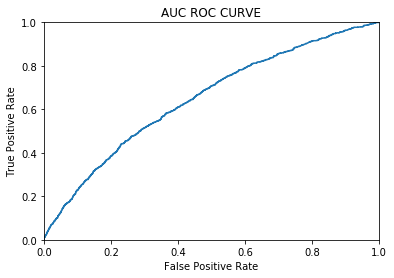

In [30]:
from sklearn.metrics import roc_auc_score,roc_curve
log_roc_curve = roc_auc_score(y_test,ypred)
print(log_roc_curve)
fpr,tpr,threshold = roc_curve(y_test,
                              logreg.predict_proba(X_test)[:,1])
#plt.figure()
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title("AUC ROC CURVE")
plt.show()
#print(threshold)

Reference: <br/>
$^{1}$[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

In [31]:
from sklearn.svm import LinearSVC
sv_model=LinearSVC(random_state=1)
sv_model.fit(X_train,y_train)
y_predsvm=sv_model.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [33]:
#C:15:,10,15,20,25,30,35,50
from sklearn.svm import SVC
sv_model2=SVC(random_state=1,C=5,gamma=0.8)
sv_model2.fit(X_train,y_train)
y_predsvm2=sv_model2.predict(X_test)
print(metrics.accuracy_score(y_test,y_predsvm2))

0.5977903851896088


metrics.accuracy_score(y_test,y_train)

In [36]:
metrics.accuracy_score(y_test,y_predsvm)

0.5258286055538967

In [37]:
print(metrics.classification_report(y_test,y_predsvm))

              precision    recall  f1-score   support

           0       0.53      1.00      0.69      1760
           1       0.67      0.00      0.00      1589

    accuracy                           0.53      3349
   macro avg       0.60      0.50      0.35      3349
weighted avg       0.59      0.53      0.36      3349

